In [1]:
import pandas as pd
import numpy as np

    
import missingno as msno
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
import plotly.express as px
import math
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

from sklearn.impute import KNNImputer
from statsmodels.formula.api import ols

from sklearn import decomposition


In [2]:
df = pd.read_csv('df_explo.csv')
df

,fat_100g,saturated_fat_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,trans_fat_100g,cholesterol_100g,salt_100g,sodium_100g,chloride_100g,carbohydrates_100g,sugars_100g,nutrition_score_fr_100g,nutrition_grade_fr_encoded,categories_fr,product_name,pnns_groups_2,nutrition_grade_fr
0,0.0,0.00,0.74,0.56,0.000,0.002880,0.0254,0.010000,0.04800,10.40,10.40,13.0,1.0,"Boissons,Boissons gazeuses,Sodas,Sodas au cola...","Pepsi, Nouveau goût !",Sweetened beverages,e
1,0.0,0.00,0.74,0.56,0.000,0.002880,0.1000,0.039370,0.04800,10.40,10.40,13.0,1.0,"Aliments et boissons à base de végétaux,Boisso...",7Up,Sweetened beverages,e
2,23.0,2.50,12.78,4.78,0.132,0.043580,0.6600,0.259843,0.40980,55.00,26.00,12.0,2.0,"Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...",Madeleines nature,Biscuits and cakes,d
3,19.0,2.50,8.76,3.28,0.138,0.043580,0.6500,0.255906,0.39620,56.00,28.00,13.0,2.0,"Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...",Cakes Raisins,Biscuits and cakes,d
4,15.0,2.00,6.42,2.66,0.066,0.029698,0.6000,0.236220,0.38100,60.00,34.00,12.0,2.0,"Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...",Cakes aux Fruits,Biscuits and cakes,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36862,0.5,0.00,0.56,0.88,0.028,0.000000,0.0300,0.011811,0.04900,10.20,9.20,4.0,3.0,"Aliments et boissons à base de végétaux,Boisso...",100% Pur Jus 4 agrumes,Fruit juices,c
36863,2.1,1.20,1.42,0.88,0.000,0.000200,0.0600,0.023622,0.34580,79.00,68.00,10.0,3.0,"Snacks sucrés,Biscuits et gâteaux,Biscuits",Cacao,unknown,c
36864,1.3,1.28,5.24,1.98,0.026,0.016000,0.0050,0.001969,0.27904,95.87,0.12,4.0,3.0,"Snacks sucrés,Confiseries,Bonbons",Spearmint sans sucres,Sweets,c
36865,1.3,1.28,5.24,1.98,0.026,0.016000,0.0010,0.000394,0.27904,95.31,0.10,2.0,4.0,"Snacks sucrés,Confiseries,Bonbons,Pastilles",Fisherman's Friend Miel-Citron,Sweets,b


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36867 entries, 0 to 36866
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fat_100g                    36867 non-null  float64
 1   saturated_fat_100g          36867 non-null  float64
 2   monounsaturated_fat_100g    36867 non-null  float64
 3   polyunsaturated_fat_100g    36867 non-null  float64
 4   trans_fat_100g              36867 non-null  float64
 5   cholesterol_100g            36867 non-null  float64
 6   salt_100g                   36867 non-null  float64
 7   sodium_100g                 36867 non-null  float64
 8   chloride_100g               36867 non-null  float64
 9   carbohydrates_100g          36867 non-null  float64
 10  sugars_100g                 36867 non-null  float64
 11  nutrition_score_fr_100g     36867 non-null  float64
 12  nutrition_grade_fr_encoded  36867 non-null  float64
 13  categories_fr               368

In [4]:
df.describe()

,fat_100g,saturated_fat_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,trans_fat_100g,cholesterol_100g,salt_100g,sodium_100g,chloride_100g,carbohydrates_100g,sugars_100g,nutrition_score_fr_100g,nutrition_grade_fr_encoded
count,36867.000000,36867.000000,36867.000000,36867.000000,36867.000000,36867.000000,36867.000000,36867.000000,36867.000000,36867.000000,36867.000000,36867.000000,36867.000000
mean,15.379360,6.241969,8.646495,3.462521,0.222456,0.072529,1.159213,0.456383,0.157579,27.541178,14.522342,10.995009,2.386959
std,17.642309,8.661127,10.939089,5.015156,0.270934,0.347712,3.830075,1.507823,0.149479,27.077722,19.715204,7.641959,1.021704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000300,0.000000,-0.100000,0.000000,1.000000
25%,2.100000,0.500000,1.420000,1.000000,0.042000,0.002000,0.100000,0.039370,0.043040,3.700000,1.000000,4.000000,2.000000
50%,9.980000,2.800000,4.360000,2.100000,0.142000,0.012922,0.702000,0.276378,0.054600,15.000000,4.800000,11.000000,2.000000
75%,23.900000,9.200000,11.460000,3.600000,0.240000,0.026642,1.400000,0.551181,0.330800,52.400000,22.200000,17.000000,3.000000
max,380.000000,210.000000,80.000000,75.000000,7.140000,10.900000,211.000000,83.000000,0.531000,190.000000,104.000000,40.000000,5.000000


### CREATION DE DEUX DATAFRAMES CATEGORIE ET NUMERIQUE POUR LES CALCULS

In [5]:
df_cat = df[['categories_fr', 'product_name', 'pnns_groups_2', 'nutrition_grade_fr']]
df_cat

,categories_fr,product_name,pnns_groups_2,nutrition_grade_fr
0,"Boissons,Boissons gazeuses,Sodas,Sodas au cola...","Pepsi, Nouveau goût !",Sweetened beverages,e
1,"Aliments et boissons à base de végétaux,Boisso...",7Up,Sweetened beverages,e
2,"Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...",Madeleines nature,Biscuits and cakes,d
3,"Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...",Cakes Raisins,Biscuits and cakes,d
4,"Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...",Cakes aux Fruits,Biscuits and cakes,d
...,...,...,...,...
36862,"Aliments et boissons à base de végétaux,Boisso...",100% Pur Jus 4 agrumes,Fruit juices,c
36863,"Snacks sucrés,Biscuits et gâteaux,Biscuits",Cacao,unknown,c
36864,"Snacks sucrés,Confiseries,Bonbons",Spearmint sans sucres,Sweets,c
36865,"Snacks sucrés,Confiseries,Bonbons,Pastilles",Fisherman's Friend Miel-Citron,Sweets,b


In [6]:
df_num = df[['fat_100g', 'saturated_fat_100g', 'monounsaturated_fat_100g',
       'polyunsaturated_fat_100g', 'trans_fat_100g', 'cholesterol_100g',
       'salt_100g', 'sodium_100g', 'chloride_100g', 'carbohydrates_100g',
       'sugars_100g', 'nutrition_score_fr_100g', 'nutrition_grade_fr_encoded']]
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36867 entries, 0 to 36866
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fat_100g                    36867 non-null  float64
 1   saturated_fat_100g          36867 non-null  float64
 2   monounsaturated_fat_100g    36867 non-null  float64
 3   polyunsaturated_fat_100g    36867 non-null  float64
 4   trans_fat_100g              36867 non-null  float64
 5   cholesterol_100g            36867 non-null  float64
 6   salt_100g                   36867 non-null  float64
 7   sodium_100g                 36867 non-null  float64
 8   chloride_100g               36867 non-null  float64
 9   carbohydrates_100g          36867 non-null  float64
 10  sugars_100g                 36867 non-null  float64
 11  nutrition_score_fr_100g     36867 non-null  float64
 12  nutrition_grade_fr_encoded  36867 non-null  float64
dtypes: float64(13)
memory usage: 3.

In [7]:
features = df.columns
features

Index(['fat_100g', 'saturated_fat_100g', 'monounsaturated_fat_100g',
       'polyunsaturated_fat_100g', 'trans_fat_100g', 'cholesterol_100g',
       'salt_100g', 'sodium_100g', 'chloride_100g', 'carbohydrates_100g',
       'sugars_100g', 'nutrition_score_fr_100g', 'nutrition_grade_fr_encoded',
       'categories_fr', 'product_name', 'pnns_groups_2', 'nutrition_grade_fr'],
      dtype='object')

In [8]:
noms = df.index
noms

RangeIndex(start=0, stop=36867, step=1)

In [9]:
nutrition_grade = df['nutrition_grade_fr'].value_counts()
nutrition_grade

d    12338
c     9764
e     8360
b     6353
a       52
Name: nutrition_grade_fr, dtype: int64

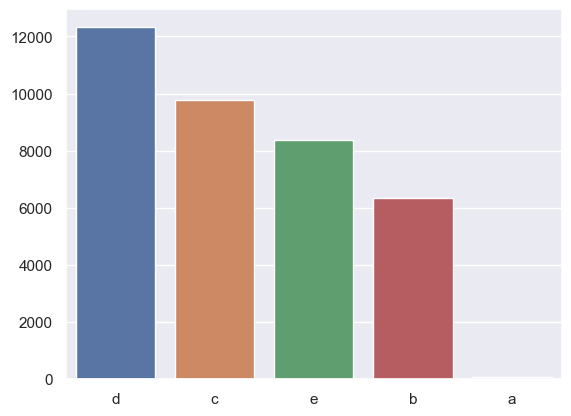

In [10]:
nutrition_grade = df['nutrition_grade_fr'].value_counts()
sns.barplot(x=nutrition_grade.index, y=nutrition_grade.values);

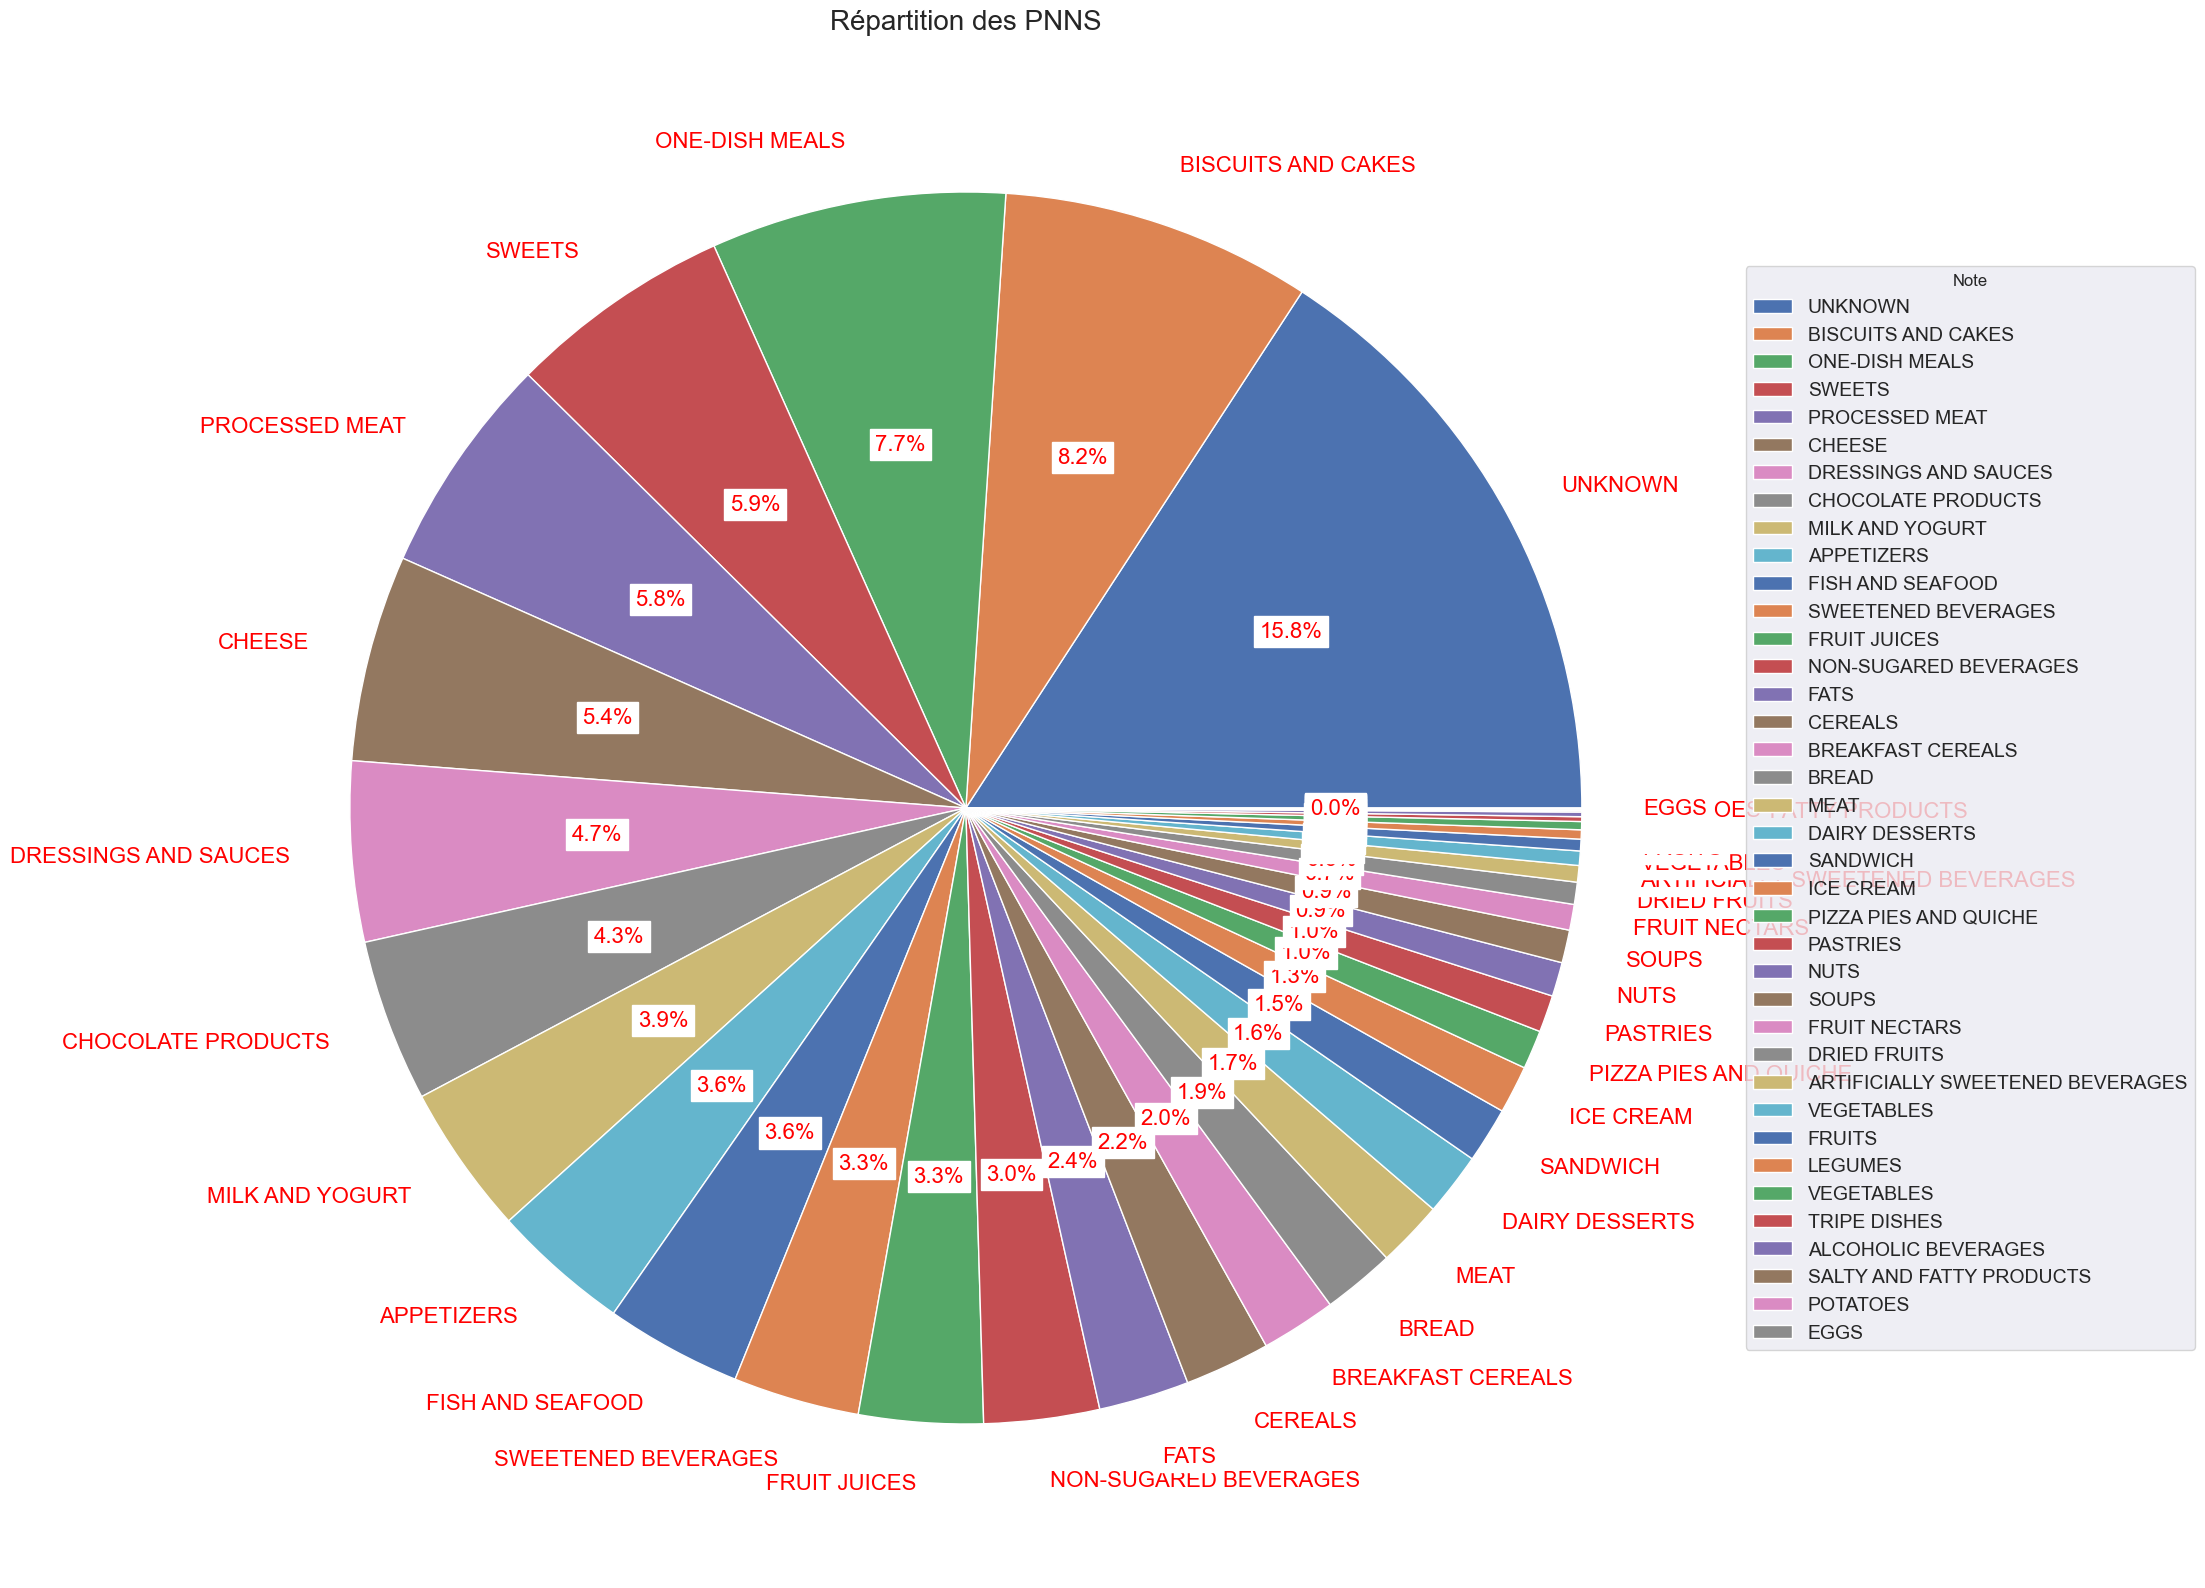

In [11]:
plt.figure(figsize=(20,20))

plt.title('Répartition des PNNS', size=20)
wedges, texts, autotexts = plt.pie(df.pnns_groups_2.value_counts().values, 
        labels = df.pnns_groups_2.value_counts().index.str.upper(),
       autopct='%1.1f%%', textprops={'fontsize': 16, 
                                     'color' : 'red', 
                                     'backgroundcolor' : 'white',}
       )

ax = plt.gca()

ax.legend(wedges, df.pnns_groups_2.value_counts().index.str.upper(),
          title="Note",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(1, 0, 0.5, 1))

### ANOVA

In [12]:
catnut = ['fat_100g', 'saturated_fat_100g', 'monounsaturated_fat_100g',
       'polyunsaturated_fat_100g', 'trans_fat_100g', 'cholesterol_100g',
       'salt_100g', 'sodium_100g', 'chloride_100g', 'carbohydrates_100g',
       'sugars_100g', 'nutrition_score_fr_100g', 'nutrition_grade_fr_encoded']

for item in catnut:
    mod = ols('{} ~ nutrition_grade_fr'.format(item), data= df).fit()
    aov_table = sm.stats.anova_lm(mod, typ=2)
    print(aov_table)

                          sum_sq       df            F  PR(>F)
nutrition_grade_fr  2.268175e+06      4.0  2270.415732     0.0
Residual            9.206406e+06  36862.0          NaN     NaN
                          sum_sq       df            F  PR(>F)
nutrition_grade_fr  7.084840e+05      4.0  3174.020272     0.0
Residual            2.057023e+06  36862.0          NaN     NaN
                          sum_sq       df           F  PR(>F)
nutrition_grade_fr  7.124593e+05      4.0  1774.95533     0.0
Residual            3.699061e+06  36862.0         NaN     NaN
                           sum_sq       df           F  PR(>F)
nutrition_grade_fr   46985.646322      4.0  491.895705     0.0
Residual            880260.224358  36862.0         NaN     NaN
                         sum_sq       df           F  PR(>F)
nutrition_grade_fr   174.931818      4.0  636.876631     0.0
Residual            2531.234606  36862.0         NaN     NaN
                         sum_sq       df            F  PR(>F)
nu

In [13]:
catpnns = ['fat_100g', 'saturated_fat_100g', 'monounsaturated_fat_100g',
       'polyunsaturated_fat_100g', 'trans_fat_100g', 'cholesterol_100g',
       'salt_100g', 'sodium_100g', 'chloride_100g', 'carbohydrates_100g',
       'sugars_100g', 'nutrition_score_fr_100g', 'nutrition_grade_fr_encoded']

for item in catpnns:
    mod = ols('{} ~ pnns_groups_2'.format(item), data= df).fit()
    aov_table = sm.stats.anova_lm(mod, typ=2)
    print(aov_table)

                     sum_sq       df            F  PR(>F)
pnns_groups_2  6.573111e+06     37.0  1334.851133     0.0
Residual       4.901470e+06  36829.0          NaN     NaN
                     sum_sq       df           F  PR(>F)
pnns_groups_2  1.340490e+06     37.0  936.336122     0.0
Residual       1.425017e+06  36829.0         NaN     NaN
                     sum_sq       df        F  PR(>F)
pnns_groups_2  1.819041e+06     37.0  698.418     0.0
Residual       2.592480e+06  36829.0      NaN     NaN
                      sum_sq       df           F  PR(>F)
pnns_groups_2  346300.770491     37.0  593.344017     0.0
Residual       580945.100189  36829.0         NaN     NaN
                    sum_sq       df          F  PR(>F)
pnns_groups_2  1168.976034     37.0  756.94818     0.0
Residual       1537.190390  36829.0        NaN     NaN
                    sum_sq       df           F  PR(>F)
pnns_groups_2  1377.454752     37.0  445.191838     0.0
Residual       3079.770476  36829.0       

### ACP/PCA

### AVANT TOUT STANDARDISER LES DONNEES UNIQUEMENT DU DF NUMERIQUE

In [14]:
df_num_stand = df_num.sample(n=100,random_state = 42)
df_num_stand

,fat_100g,saturated_fat_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,trans_fat_100g,cholesterol_100g,salt_100g,sodium_100g,chloride_100g,carbohydrates_100g,sugars_100g,nutrition_score_fr_100g,nutrition_grade_fr_encoded
19750,20.00,7.90,34.280,6.340,0.377,0.029120,3.10000,1.220472,0.028976,1.40,1.2,20.0,1.0
30253,0.90,0.02,1.118,1.204,0.026,0.016000,1.80086,0.709000,0.279040,73.50,0.2,6.0,3.0
14812,4.60,1.20,1.978,1.398,0.006,0.000400,0.10000,0.039370,0.279040,64.00,3.0,0.0,4.0
20257,2.90,2.10,1.460,0.820,0.128,0.000000,0.10000,0.039370,0.051800,10.00,8.0,1.0,4.0
15714,16.06,3.10,14.460,4.320,0.120,0.001000,2.60000,1.023622,0.027556,10.80,0.5,11.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26998,30.00,11.00,36.020,7.740,0.677,0.028420,1.80000,0.708661,0.028976,3.00,2.0,21.0,1.0
24903,37.00,15.00,12.500,2.140,0.177,2.193880,0.21000,0.082677,0.343600,50.00,48.0,23.0,1.0
25579,1.70,0.80,1.812,1.198,0.026,0.000000,21.40000,8.425197,0.279040,67.50,2.5,16.0,2.0
18169,30.00,14.40,35.500,6.280,0.477,0.028420,5.00000,1.968504,0.028976,2.60,2.6,25.0,1.0


In [15]:
X = df_num_stand.values
X[:5]


array([[2.00000000e+01, 7.90000000e+00, 3.42800000e+01, 6.34000000e+00,
        3.77000000e-01, 2.91200000e-02, 3.10000000e+00, 1.22047244e+00,
        2.89760000e-02, 1.40000000e+00, 1.20000000e+00, 2.00000000e+01,
        1.00000000e+00],
       [9.00000000e-01, 2.00000000e-02, 1.11800000e+00, 1.20400000e+00,
        2.60000000e-02, 1.60000000e-02, 1.80086000e+00, 7.09000000e-01,
        2.79040000e-01, 7.35000000e+01, 2.00000000e-01, 6.00000000e+00,
        3.00000000e+00],
       [4.60000000e+00, 1.20000000e+00, 1.97800000e+00, 1.39800000e+00,
        6.00000000e-03, 4.00000000e-04, 1.00000000e-01, 3.93700787e-02,
        2.79040000e-01, 6.40000000e+01, 3.00000000e+00, 0.00000000e+00,
        4.00000000e+00],
       [2.90000000e+00, 2.10000000e+00, 1.46000000e+00, 8.20000000e-01,
        1.28000000e-01, 0.00000000e+00, 1.00000000e-01, 3.93700787e-02,
        5.18000000e-02, 1.00000000e+01, 8.00000000e+00, 1.00000000e+00,
        4.00000000e+00],
       [1.60600000e+01, 3.10000000e+

In [16]:
scaler = StandardScaler()
scaler.fit(X)





StandardScaler()

In [17]:
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[ 0.38478565,  0.27606544,  2.25804689,  0.66794665,  0.971895  ,
        -0.14182769,  0.92701877,  0.92701877, -0.89748439, -1.00410202,
        -0.74234519,  1.24783325, -1.48633623],
       [-0.77597188, -0.81468651, -0.62990362, -0.36549138, -0.81262062,
        -0.17716532,  0.35318458,  0.35318458,  0.73050482,  1.66772245,
        -0.7965203 , -0.49564634,  0.43151697],
       [-0.55111309, -0.65135056, -0.55500954, -0.32645575, -0.91430242,
        -0.21918262, -0.39809059, -0.39809059,  0.73050482,  1.315679  ,
        -0.64483001, -1.24285188,  1.39044357],
       [-0.65442659, -0.52677229, -0.60012016, -0.44275777, -0.29404343,
        -0.22025999, -0.39809059, -0.39809059, -0.74889352, -0.68541006,
        -0.37395449, -1.11831762,  1.39044357],
       [ 0.14534143, -0.38835199,  0.53199964,  0.26149322, -0.33471615,
        -0.21756657,  0.70616721,  0.70616721, -0.906729  , -0.6557643 ,
        -0.78026776,  0.12702494, -0.52740963]])

In [18]:
n_components = 6

In [19]:
pca = PCA(n_components=n_components)

In [20]:
pca.fit(X_scaled)

PCA(n_components=6)

In [21]:
print(pca.explained_variance_ratio_)


[0.35883519 0.24846747 0.1582013  0.07459552 0.05858798 0.03308897]


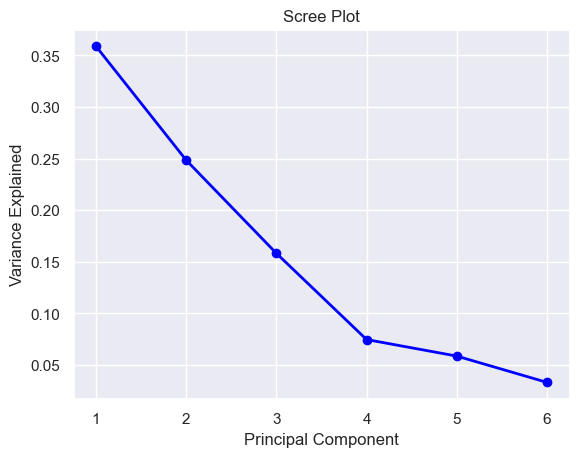

In [22]:
PCA_values = np.arange(pca.n_components_) + 1
plt.plot(PCA_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [23]:
variance_expliquée = pd.DataFrame(
    {
        "Dimension" : ["D" + str(x + 1) for x in range(6)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
variance_expliquée

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,D1,4.711977,36.0,36.0
1,D2,3.262704,25.0,61.0
2,D3,2.077391,16.0,77.0
3,D4,0.979537,7.0,84.0
4,D5,0.769337,6.0,90.0
5,D6,0.434502,3.0,93.0


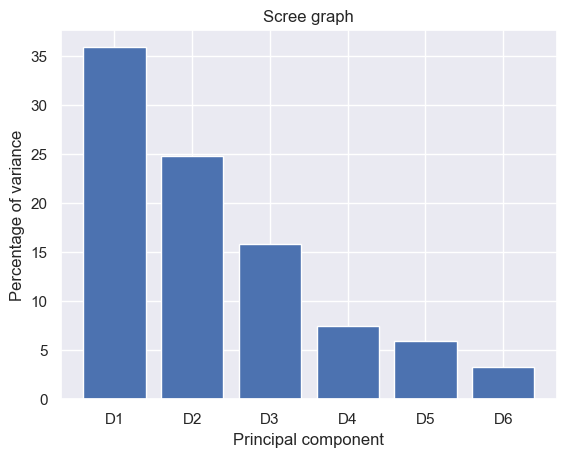

[35.9 24.8 15.8  7.5  5.9  3.3]


In [24]:
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['D'+ str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=(per_var), tick_label=labels)
plt.ylabel('Percentage of variance')
plt.xlabel('Principal component')
plt.title('Scree graph')
plt.show()

print(per_var)

### INERTIE

In [25]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()


In [26]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

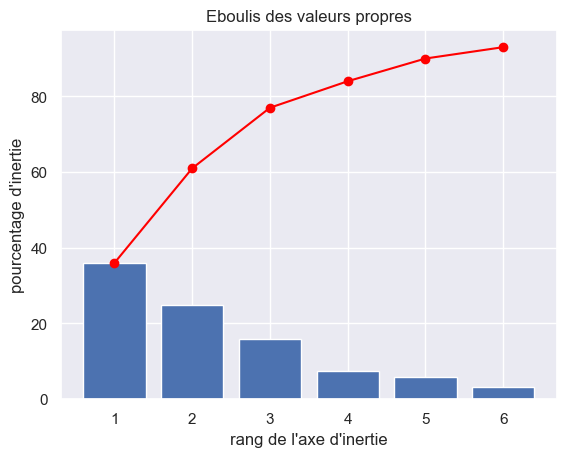

In [27]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

### INDIVIDUS

### CREATION DE DATAFRAME POUR LA PROJECTION, CIBLANT LES VARIABLES ET CREATION DES NUMERIQUES POUR LA TRANSFORMATION

In [28]:
df_num_ind= df[['fat_100g', 'saturated_fat_100g', 'monounsaturated_fat_100g',
       'polyunsaturated_fat_100g', 'trans_fat_100g', 'cholesterol_100g',
       'salt_100g', 'sodium_100g', 'chloride_100g', 'carbohydrates_100g',
       'sugars_100g', 'nutrition_score_fr_100g', 'nutrition_grade_fr_encoded','pnns_groups_2','nutrition_grade_fr']]
df_num_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36867 entries, 0 to 36866
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fat_100g                    36867 non-null  float64
 1   saturated_fat_100g          36867 non-null  float64
 2   monounsaturated_fat_100g    36867 non-null  float64
 3   polyunsaturated_fat_100g    36867 non-null  float64
 4   trans_fat_100g              36867 non-null  float64
 5   cholesterol_100g            36867 non-null  float64
 6   salt_100g                   36867 non-null  float64
 7   sodium_100g                 36867 non-null  float64
 8   chloride_100g               36867 non-null  float64
 9   carbohydrates_100g          36867 non-null  float64
 10  sugars_100g                 36867 non-null  float64
 11  nutrition_score_fr_100g     36867 non-null  float64
 12  nutrition_grade_fr_encoded  36867 non-null  float64
 13  pnns_groups_2               368

In [29]:
df_num_cutoff = df_num_ind.sample(n=100,random_state = 42)
df_num_cutoff

,fat_100g,saturated_fat_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,trans_fat_100g,cholesterol_100g,salt_100g,sodium_100g,chloride_100g,carbohydrates_100g,sugars_100g,nutrition_score_fr_100g,nutrition_grade_fr_encoded,pnns_groups_2,nutrition_grade_fr
19750,20.00,7.90,34.280,6.340,0.377,0.029120,3.10000,1.220472,0.028976,1.40,1.2,20.0,1.0,Processed meat,e
30253,0.90,0.02,1.118,1.204,0.026,0.016000,1.80086,0.709000,0.279040,73.50,0.2,6.0,3.0,Appetizers,c
14812,4.60,1.20,1.978,1.398,0.006,0.000400,0.10000,0.039370,0.279040,64.00,3.0,0.0,4.0,Cereals,b
20257,2.90,2.10,1.460,0.820,0.128,0.000000,0.10000,0.039370,0.051800,10.00,8.0,1.0,4.0,Milk and yogurt,b
15714,16.06,3.10,14.460,4.320,0.120,0.001000,2.60000,1.023622,0.027556,10.80,0.5,11.0,2.0,Cheese,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26998,30.00,11.00,36.020,7.740,0.677,0.028420,1.80000,0.708661,0.028976,3.00,2.0,21.0,1.0,Processed meat,e
24903,37.00,15.00,12.500,2.140,0.177,2.193880,0.21000,0.082677,0.343600,50.00,48.0,23.0,1.0,Chocolate products,e
25579,1.70,0.80,1.812,1.198,0.026,0.000000,21.40000,8.425197,0.279040,67.50,2.5,16.0,2.0,unknown,d
18169,30.00,14.40,35.500,6.280,0.477,0.028420,5.00000,1.968504,0.028976,2.60,2.6,25.0,1.0,Processed meat,e


In [30]:
col_num=['fat_100g', 'saturated_fat_100g', 'monounsaturated_fat_100g',
       'polyunsaturated_fat_100g', 'trans_fat_100g', 'cholesterol_100g',
       'salt_100g', 'sodium_100g', 'chloride_100g', 'carbohydrates_100g',
       'sugars_100g', 'nutrition_score_fr_100g', 'nutrition_grade_fr_encoded']
df_num_cutoff[col_num]

,fat_100g,saturated_fat_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,trans_fat_100g,cholesterol_100g,salt_100g,sodium_100g,chloride_100g,carbohydrates_100g,sugars_100g,nutrition_score_fr_100g,nutrition_grade_fr_encoded
19750,20.00,7.90,34.280,6.340,0.377,0.029120,3.10000,1.220472,0.028976,1.40,1.2,20.0,1.0
30253,0.90,0.02,1.118,1.204,0.026,0.016000,1.80086,0.709000,0.279040,73.50,0.2,6.0,3.0
14812,4.60,1.20,1.978,1.398,0.006,0.000400,0.10000,0.039370,0.279040,64.00,3.0,0.0,4.0
20257,2.90,2.10,1.460,0.820,0.128,0.000000,0.10000,0.039370,0.051800,10.00,8.0,1.0,4.0
15714,16.06,3.10,14.460,4.320,0.120,0.001000,2.60000,1.023622,0.027556,10.80,0.5,11.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26998,30.00,11.00,36.020,7.740,0.677,0.028420,1.80000,0.708661,0.028976,3.00,2.0,21.0,1.0
24903,37.00,15.00,12.500,2.140,0.177,2.193880,0.21000,0.082677,0.343600,50.00,48.0,23.0,1.0
25579,1.70,0.80,1.812,1.198,0.026,0.000000,21.40000,8.425197,0.279040,67.50,2.5,16.0,2.0
18169,30.00,14.40,35.500,6.280,0.477,0.028420,5.00000,1.968504,0.028976,2.60,2.6,25.0,1.0


In [31]:
scaler = StandardScaler()
df_num_cutoff[col_num]=scaler.fit_transform(df_num_cutoff[col_num])
df_num_cutoff[col_num]


,fat_100g,saturated_fat_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,trans_fat_100g,cholesterol_100g,salt_100g,sodium_100g,chloride_100g,carbohydrates_100g,sugars_100g,nutrition_score_fr_100g,nutrition_grade_fr_encoded
19750,0.384786,0.276065,2.258047,0.667947,0.971895,-0.141828,0.927019,0.927019,-0.897484,-1.004102,-0.742345,1.247833,-1.486336
30253,-0.775972,-0.814687,-0.629904,-0.365491,-0.812621,-0.177165,0.353185,0.353185,0.730505,1.667722,-0.796520,-0.495646,0.431517
14812,-0.551113,-0.651351,-0.555010,-0.326456,-0.914302,-0.219183,-0.398091,-0.398091,0.730505,1.315679,-0.644830,-1.242852,1.390444
20257,-0.654427,-0.526772,-0.600120,-0.442758,-0.294043,-0.220260,-0.398091,-0.398091,-0.748894,-0.685410,-0.373954,-1.118318,1.390444
15714,0.145341,-0.388352,0.532000,0.261493,-0.334716,-0.217567,0.706167,0.706167,-0.906729,-0.655764,-0.780268,0.127025,-0.527410
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26998,0.992512,0.705168,2.409577,0.949647,2.497122,-0.143713,0.352805,0.352805,-0.897484,-0.944810,-0.699005,1.372368,-1.486336
24903,1.417921,1.258850,0.361311,-0.177155,-0.044923,5.688774,-0.349503,-0.349503,1.150809,0.796878,1.793050,1.621436,-1.486336
25579,-0.727354,-0.706719,-0.569466,-0.366699,-0.812621,-0.220260,9.010186,9.010186,0.730505,1.445379,-0.671918,0.749696,-0.527410
18169,0.992512,1.175797,2.364292,0.655874,1.480304,-0.143713,1.766255,1.766255,-0.897484,-0.959633,-0.666500,1.870505,-1.486336


In [32]:
n_components = 6
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=6)

In [33]:
Individus= pca.transform(df_num_cutoff[col_num])
Individus

C:\Users\emili\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


array([[ 2.57460256e+00, -2.08680684e+00,  9.92458045e-01,
         5.43097188e-02, -8.28760121e-01, -3.09351620e-01],
       [-1.42860037e+00,  1.03314887e+00,  1.10650866e+00,
        -5.09083342e-01,  5.31079450e-01,  1.58142373e-01],
       [-2.06962029e+00,  8.58903482e-01, -1.66649357e-01,
        -6.45838635e-01,  9.52692265e-01,  2.32338898e-01],
       [-2.16434601e+00, -8.30221999e-01, -6.24104895e-01,
         2.31635226e-01,  1.93819504e-01,  3.81392567e-02],
       [ 2.30827190e-01, -1.34057224e+00,  8.87036096e-01,
         8.77280715e-02,  1.80994481e-01,  1.04139631e-01],
       [-2.14563047e+00, -1.11272277e+00,  5.12981656e-02,
         2.70632153e-01,  4.42026397e-01,  3.92819341e-02],
       [ 2.65312579e+00, -1.30909256e+00,  2.14865144e-01,
        -1.00280601e+00,  7.74213524e-01, -9.47856356e-01],
       [-1.96258522e+00, -3.92645252e-01, -4.68992123e-01,
         2.26211585e-01,  8.34094189e-03,  5.03131948e-02],
       [-1.89380517e+00, -1.10619097e+00, -3.259

In [34]:
Individus_nut = pd.DataFrame({
    "D1" : Individus[:,0], 
    "D2" : Individus[:,1],
    "nutrition_grade_fr" : df_num_cutoff["nutrition_grade_fr"],
    "pnns_groups_2" : df_num_cutoff["pnns_groups_2"]
})

# Résultat (premières lignes)
Individus_nut

,D1,D2,nutrition_grade_fr,pnns_groups_2
19750,2.574603,-2.086807,e,Processed meat
30253,-1.428600,1.033149,c,Appetizers
14812,-2.069620,0.858903,b,Cereals
20257,-2.164346,-0.830222,b,Milk and yogurt
15714,0.230827,-1.340572,d,Cheese
...,...,...,...,...
26998,3.484624,-2.474005,e,Processed meat
24903,3.556326,3.198447,e,Chocolate products
25579,0.910366,-0.820476,d,unknown
18169,3.736459,-2.344811,e,Processed meat


In [35]:
# permet de créer une palette de couleurs, basée sur Color Brewer
palette = plt.get_cmap("Dark2")
# associe une couleur à chaque continent (cf ci-dessous)
couleurs = dict(zip(Individus_nut["pnns_groups_2"].drop_duplicates(), palette(range(26))))
couleurs
position = dict(zip(couleurs.keys(), range(26)))
position

{'Processed meat': 0,
 'Appetizers': 1,
 'Cereals': 2,
 'Milk and yogurt': 3,
 'Cheese': 4,
 'Dressings and sauces': 5,
 'Fruit juices': 6,
 'One-dish meals': 7,
 'Fats': 8,
 'unknown': 9,
 'Dried fruits': 10,
 'Sweets': 11,
 'Biscuits and cakes': 12,
 'Chocolate products': 13,
 'Dairy desserts': 14,
 'Fish and seafood': 15,
 'vegetables': 16,
 'Nuts': 17,
 'Breakfast cereals': 18,
 'Bread': 19,
 'Sweetened beverages': 20,
 'Alcoholic beverages': 21,
 'Ice cream': 22,
 'Artificially sweetened beverages': 23,
 'Soups': 24,
 'pastries': 25}

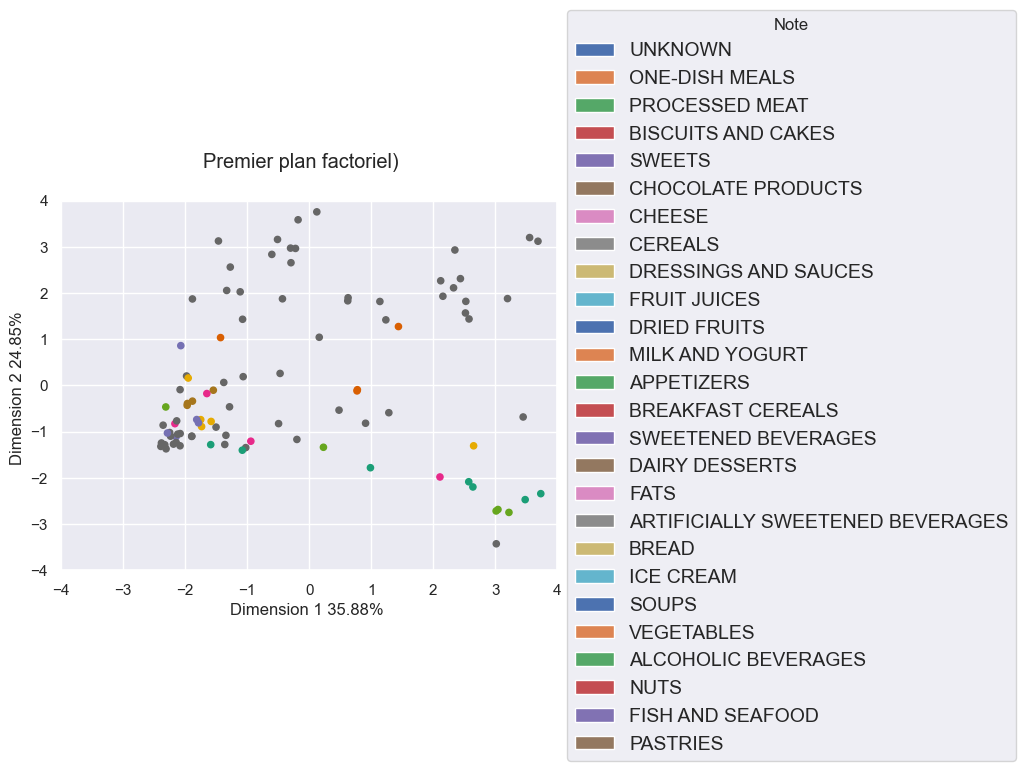

In [36]:
Individus_nut.plot.scatter("D1", "D2",c = [couleurs[p] for p in Individus_nut["pnns_groups_2"]]) # nuage de points
plt.xlabel("Dimension 1 {:.02f}% ".format(pca.explained_variance_ratio_[0]*100 )) # modification du nom de l'axe X
plt.ylabel("Dimension 2 {:.02f}% ".format(pca.explained_variance_ratio_[1]*100 )) # idem pour axe Y
plt.suptitle("Premier plan factoriel)") # titre général
#col + ": {:.02f}% null values".format(df[col].isnull().sum() / df.shape[0]*100))
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.plot()
plt.legend(wedges, Individus_nut.pnns_groups_2.value_counts().index.str.upper(),
          title="Note",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(1, 0, 0.5, 1))

In [37]:
Individus_nut = pd.DataFrame({
    "D3" : Individus[:,2], 
    "D4" : Individus[:,3],
    "nutrition_grade_fr" : df_num_cutoff["nutrition_grade_fr"],
    "pnns_groups_2" : df_num_cutoff["pnns_groups_2"]
})

# Résultat (premières lignes)
Individus_nut

,D3,D4,nutrition_grade_fr,pnns_groups_2
19750,0.992458,0.054310,e,Processed meat
30253,1.106509,-0.509083,c,Appetizers
14812,-0.166649,-0.645839,b,Cereals
20257,-0.624105,0.231635,b,Milk and yogurt
15714,0.887036,0.087728,d,Cheese
...,...,...,...,...
26998,-0.031728,-0.146048,e,Processed meat
24903,-0.922161,4.246120,e,Chocolate products
25579,12.740072,0.618504,d,unknown
18169,1.918704,0.282781,e,Processed meat


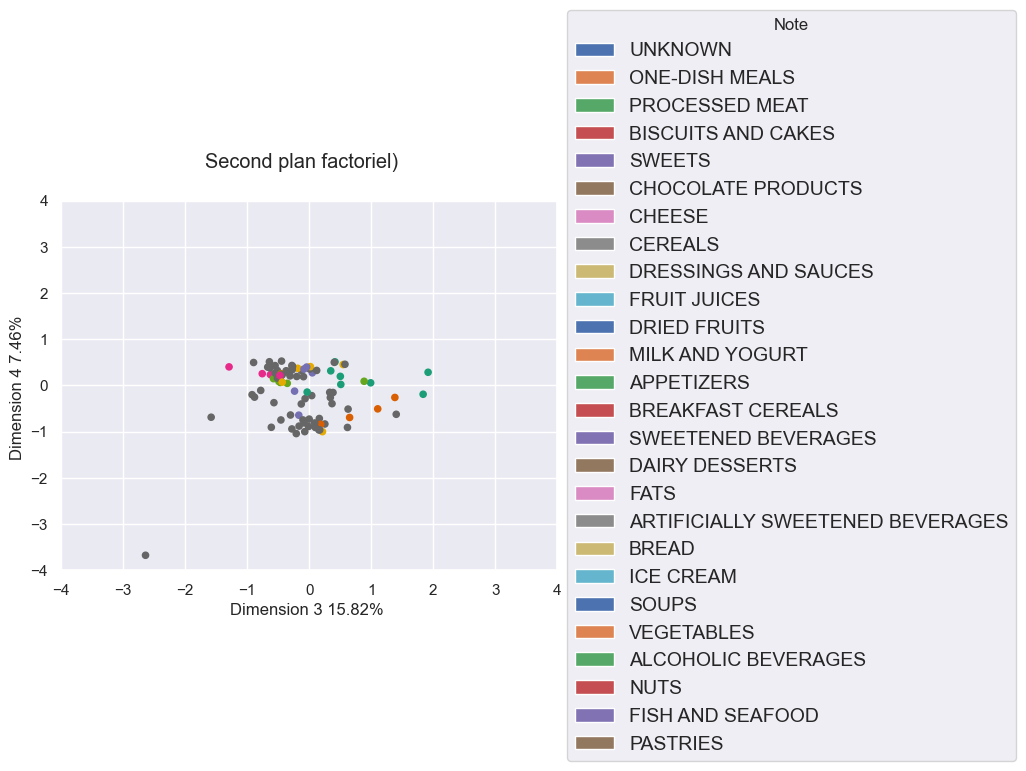

In [38]:
Individus_nut.plot.scatter("D3", "D4",c = [couleurs[p] for p in Individus_nut["pnns_groups_2"]]) # nuage de points
plt.xlabel("Dimension 3 {:.02f}% ".format(pca.explained_variance_ratio_[2]*100 )) # modification du nom de l'axe X
plt.ylabel("Dimension 4 {:.02f}% ".format(pca.explained_variance_ratio_[3]*100 )) # idem pour axe Y
plt.suptitle("Second plan factoriel)") # titre général
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.legend(wedges, Individus_nut.pnns_groups_2.value_counts().index.str.upper(),
          title="Note",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(1, 0, 0.5, 1))

### SEL

In [39]:
df_salt= df[['salt_100g', 'sodium_100g', 'chloride_100g', 'nutrition_score_fr_100g', 'nutrition_grade_fr_encoded','pnns_groups_2','nutrition_grade_fr']]
df_salt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36867 entries, 0 to 36866
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   salt_100g                   36867 non-null  float64
 1   sodium_100g                 36867 non-null  float64
 2   chloride_100g               36867 non-null  float64
 3   nutrition_score_fr_100g     36867 non-null  float64
 4   nutrition_grade_fr_encoded  36867 non-null  float64
 5   pnns_groups_2               36867 non-null  object 
 6   nutrition_grade_fr          36867 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.0+ MB


In [40]:
df_salt_cutoff = df_salt.sample(n=100,random_state = 38)
df_salt_cutoff

,salt_100g,sodium_100g,chloride_100g,nutrition_score_fr_100g,nutrition_grade_fr_encoded,pnns_groups_2,nutrition_grade_fr
3520,0.381,0.150000,0.057600,4.0,3.0,Milk and yogurt,c
36403,5.800,2.283465,0.028596,11.0,2.0,Dressings and sauces,d
15811,1.800,0.708661,0.057660,3.0,3.0,Processed meat,c
28373,0.000,0.000000,0.054600,3.0,3.0,unknown,c
751,3.690,1.452756,0.028976,19.0,1.0,Cheese,e
...,...,...,...,...,...,...,...
26163,0.485,0.190945,0.044440,10.0,3.0,Biscuits and cakes,c
8975,4.318,1.700000,0.054600,2.0,4.0,One-dish meals,b
19269,0.050,0.019685,0.054600,1.0,4.0,Fruits,b
9947,0.900,0.354331,0.034840,11.0,2.0,unknown,d


In [41]:
col_num_salt=['salt_100g', 'sodium_100g', 'chloride_100g','nutrition_score_fr_100g', 'nutrition_grade_fr_encoded']
df_salt_cutoff[col_num_salt]

,salt_100g,sodium_100g,chloride_100g,nutrition_score_fr_100g,nutrition_grade_fr_encoded
3520,0.381,0.150000,0.057600,4.0,3.0
36403,5.800,2.283465,0.028596,11.0,2.0
15811,1.800,0.708661,0.057660,3.0,3.0
28373,0.000,0.000000,0.054600,3.0,3.0
751,3.690,1.452756,0.028976,19.0,1.0
...,...,...,...,...,...
26163,0.485,0.190945,0.044440,10.0,3.0
8975,4.318,1.700000,0.054600,2.0,4.0
19269,0.050,0.019685,0.054600,1.0,4.0
9947,0.900,0.354331,0.034840,11.0,2.0


In [42]:
scaler = StandardScaler()
df_salt_cutoff[col_num_salt]=scaler.fit_transform(df_salt_cutoff[col_num_salt])
df_salt_cutoff[col_num_salt]


,salt_100g,sodium_100g,chloride_100g,nutrition_score_fr_100g,nutrition_grade_fr_encoded
3520,-0.523167,-0.523163,-0.564964,-0.920766,0.593072
36403,2.791224,2.791242,-0.762633,-0.005232,-0.379177
15811,0.344727,0.344736,-0.564555,-1.051556,0.593072
28373,-0.756196,-0.756193,-0.585409,-1.051556,0.593072
751,1.500697,1.500710,-0.760043,1.041093,-1.351427
...,...,...,...,...,...
26163,-0.459558,-0.459554,-0.654652,-0.136022,0.593072
8975,1.884797,1.884812,-0.585409,-1.182347,1.565322
19269,-0.725615,-0.725611,-0.585409,-1.313138,1.565322
9947,-0.205734,-0.205728,-0.720079,-0.005232,-0.379177


In [43]:
n_components = 6
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=6)

In [44]:
Individus_salt = pd.DataFrame({
    "D1" : Individus[:,0], 
    "D2" : Individus[:,1],
    "salt_100g" : df_salt_cutoff["salt_100g"],
    "nutrition_grade_fr" : df_salt_cutoff["nutrition_grade_fr"]
})

# Résultat (premières lignes)
Individus_salt

,D1,D2,salt_100g,nutrition_grade_fr
3520,2.574603,-2.086807,-0.523167,c
36403,-1.428600,1.033149,2.791224,d
15811,-2.069620,0.858903,0.344727,c
28373,-2.164346,-0.830222,-0.756196,c
751,0.230827,-1.340572,1.500697,e
...,...,...,...,...
26163,3.484624,-2.474005,-0.459558,c
8975,3.556326,3.198447,1.884797,b
19269,0.910366,-0.820476,-0.725615,b
9947,3.736459,-2.344811,-0.205734,d


In [45]:
#permet de créer une palette de couleurs, basée sur Color Brewer
palette = plt.get_cmap("Dark2")
# associe une couleur à chaque continent (cf ci-dessous)
couleurs = dict(zip(Individus_salt["nutrition_grade_fr"].drop_duplicates(), palette(range(6))))
couleurs
position = dict(zip(couleurs.keys(), range(6)))
position

{'c': 0, 'd': 1, 'e': 2, 'b': 3}

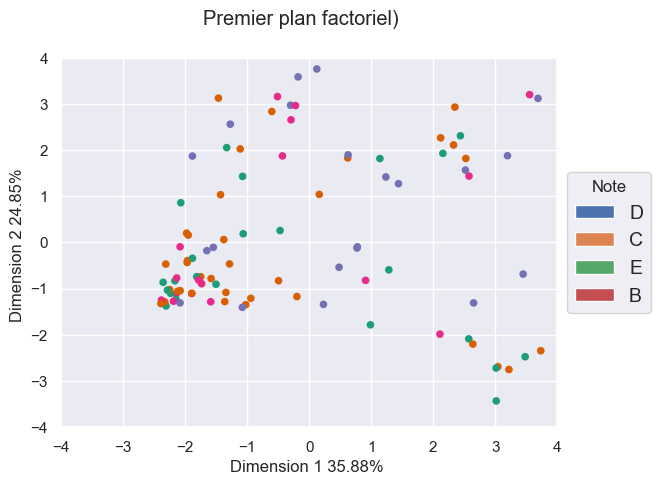

In [46]:
Individus_salt.plot.scatter("D1", "D2",c = [couleurs[p] for p in Individus_salt["nutrition_grade_fr"]]) # nuage de points
plt.xlabel("Dimension 1 {:.02f}% ".format(pca.explained_variance_ratio_[0]*100 )) # modification du nom de l'axe X
plt.ylabel("Dimension 2 {:.02f}% ".format(pca.explained_variance_ratio_[1]*100 )) # idem pour axe Y
plt.suptitle("Premier plan factoriel)") # titre général
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.plot()
plt.legend(wedges, Individus_salt.nutrition_grade_fr.value_counts().index.str.upper(),
          title="Note",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(1, 0, 0.5, 1))

### SUCRE

In [47]:
df_sugar= df[['carbohydrates_100g','sugars_100g', 'nutrition_score_fr_100g', 'nutrition_grade_fr_encoded','pnns_groups_2','nutrition_grade_fr']]
df_sugar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36867 entries, 0 to 36866
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   carbohydrates_100g          36867 non-null  float64
 1   sugars_100g                 36867 non-null  float64
 2   nutrition_score_fr_100g     36867 non-null  float64
 3   nutrition_grade_fr_encoded  36867 non-null  float64
 4   pnns_groups_2               36867 non-null  object 
 5   nutrition_grade_fr          36867 non-null  object 
dtypes: float64(4), object(2)
memory usage: 1.7+ MB


In [48]:
df_sugar_cutoff = df_sugar.sample(n=100,random_state = 36)
df_sugar_cutoff

,carbohydrates_100g,sugars_100g,nutrition_score_fr_100g,nutrition_grade_fr_encoded,pnns_groups_2,nutrition_grade_fr
23201,4.50,4.5,0.0,4.0,Milk and yogurt,b
17043,27.10,1.4,16.0,2.0,One-dish meals,d
18574,1.90,0.5,16.0,2.0,Cheese,d
28629,22.86,1.8,17.0,2.0,Dressings and sauces,d
8676,50.70,11.8,7.0,3.0,pastries,c
...,...,...,...,...,...,...
18857,0.70,0.4,14.0,2.0,Fish and seafood,d
13594,57.50,57.2,26.0,1.0,Chocolate products,e
19900,6.20,4.4,3.0,3.0,Dressings and sauces,c
24995,5.80,5.6,8.0,2.0,Sweetened beverages,d


In [49]:
col_num_sugar=['carbohydrates_100g', 'sugars_100g', 'nutrition_score_fr_100g', 'nutrition_grade_fr_encoded']
df_sugar_cutoff[col_num_sugar]

,carbohydrates_100g,sugars_100g,nutrition_score_fr_100g,nutrition_grade_fr_encoded
23201,4.50,4.5,0.0,4.0
17043,27.10,1.4,16.0,2.0
18574,1.90,0.5,16.0,2.0
28629,22.86,1.8,17.0,2.0
8676,50.70,11.8,7.0,3.0
...,...,...,...,...
18857,0.70,0.4,14.0,2.0
13594,57.50,57.2,26.0,1.0
19900,6.20,4.4,3.0,3.0
24995,5.80,5.6,8.0,2.0


In [50]:
scaler = StandardScaler()
df_sugar_cutoff[col_num_sugar]=scaler.fit_transform(df_sugar_cutoff[col_num_sugar])
df_sugar_cutoff[col_num_sugar]


,carbohydrates_100g,sugars_100g,nutrition_score_fr_100g,nutrition_grade_fr_encoded
23201,-0.695129,-0.353697,-1.338449,1.412492
17043,0.215739,-0.525046,0.824701,-0.522428
18574,-0.799919,-0.574792,0.824701,-0.522428
28629,0.044850,-0.502936,0.959898,-0.522428
8676,1.166910,0.049802,-0.392071,0.445032
...,...,...,...,...
18857,-0.848284,-0.580320,0.554307,-0.522428
13594,1.440977,2.559232,2.176670,-1.489889
19900,-0.626613,-0.359224,-0.932858,0.445032
24995,-0.642734,-0.292896,-0.256874,-0.522428


In [51]:
n_components = 6
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=6)

In [52]:
Individus_sugar = pd.DataFrame({
    "D1" : Individus[:,0], 
    "D2" : Individus[:,1],
    "sugars_100g" : df_sugar_cutoff["sugars_100g"],
    "nutrition_grade_fr" : df_sugar_cutoff["nutrition_grade_fr"]
})

# Résultat (premières lignes)
Individus_sugar

,D1,D2,sugars_100g,nutrition_grade_fr
23201,2.574603,-2.086807,-0.353697,b
17043,-1.428600,1.033149,-0.525046,d
18574,-2.069620,0.858903,-0.574792,d
28629,-2.164346,-0.830222,-0.502936,d
8676,0.230827,-1.340572,0.049802,c
...,...,...,...,...
18857,3.484624,-2.474005,-0.580320,d
13594,3.556326,3.198447,2.559232,e
19900,0.910366,-0.820476,-0.359224,c
24995,3.736459,-2.344811,-0.292896,d


In [53]:
#permet de créer une palette de couleurs, basée sur Color Brewer
palette = plt.get_cmap("Dark2")
# associe une couleur à chaque continent (cf ci-dessous)
couleurs = dict(zip(Individus_sugar["nutrition_grade_fr"].drop_duplicates(), palette(range(6))))
couleurs
position = dict(zip(couleurs.keys(), range(6)))
position

{'b': 0, 'd': 1, 'c': 2, 'e': 3}

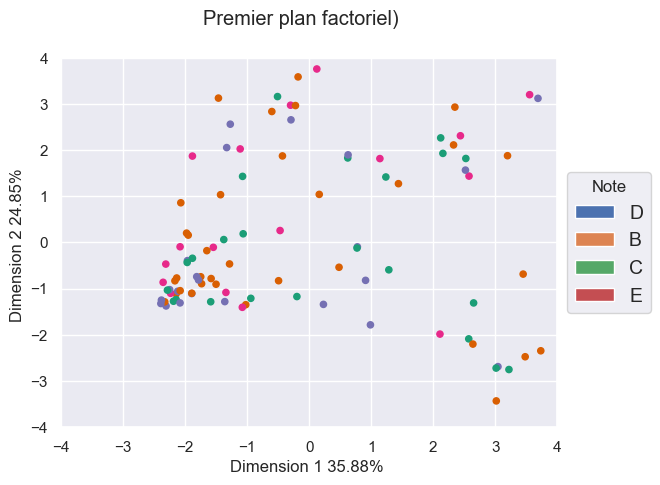

In [54]:
Individus_sugar.plot.scatter("D1", "D2",c = [couleurs[p] for p in Individus_sugar["nutrition_grade_fr"]]) # nuage de points
plt.xlabel("Dimension 1 {:.02f}% ".format(pca.explained_variance_ratio_[0]*100 )) # modification du nom de l'axe X
plt.ylabel("Dimension 2 {:.02f}% ".format(pca.explained_variance_ratio_[1]*100 )) # idem pour axe Y
plt.suptitle("Premier plan factoriel)") # titre général
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.plot()
plt.legend(wedges, Individus_sugar.nutrition_grade_fr.value_counts().index.str.upper(),
          title="Note",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(1, 0, 0.5, 1))

### GRAS

In [55]:
df_fat= df[['fat_100g', 'saturated_fat_100g', 'monounsaturated_fat_100g','polyunsaturated_fat_100g', 'trans_fat_100g', 'cholesterol_100g', 'nutrition_grade_fr_encoded','pnns_groups_2','nutrition_grade_fr']]
df_fat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36867 entries, 0 to 36866
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fat_100g                    36867 non-null  float64
 1   saturated_fat_100g          36867 non-null  float64
 2   monounsaturated_fat_100g    36867 non-null  float64
 3   polyunsaturated_fat_100g    36867 non-null  float64
 4   trans_fat_100g              36867 non-null  float64
 5   cholesterol_100g            36867 non-null  float64
 6   nutrition_grade_fr_encoded  36867 non-null  float64
 7   pnns_groups_2               36867 non-null  object 
 8   nutrition_grade_fr          36867 non-null  object 
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [56]:
df_fat_cutoff = df_fat.sample(n=100,random_state = 34)
df_fat_cutoff

,fat_100g,saturated_fat_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,trans_fat_100g,cholesterol_100g,nutrition_grade_fr_encoded,pnns_groups_2,nutrition_grade_fr
25317,0.50,0.50,1.420,0.880,0.0000,0.000200,2.0,unknown,d
18561,2.50,1.20,1.520,0.560,0.2160,0.024600,3.0,Tripe dishes,c
12888,0.20,0.02,1.760,0.900,0.0800,0.000000,2.0,unknown,d
22315,23.36,12.55,14.140,3.360,0.0770,0.018620,3.0,Biscuits and cakes,c
9790,13.00,5.20,4.800,1.060,0.2000,0.012000,2.0,Sandwich,d
...,...,...,...,...,...,...,...,...,...
14414,11.00,1.10,4.100,2.260,0.2000,0.002200,4.0,unknown,b
30438,21.90,2.39,13.480,6.280,0.0400,0.049200,3.0,unknown,c
23719,0.50,0.00,0.594,0.666,0.0280,0.000000,3.0,Fruit juices,c
34434,36.50,15.50,12.500,2.140,0.2722,2.195237,1.0,Sweets,e


In [57]:
col_num_fat=['fat_100g', 'saturated_fat_100g', 'monounsaturated_fat_100g','polyunsaturated_fat_100g', 'trans_fat_100g', 'cholesterol_100g', 'nutrition_grade_fr_encoded']
df_fat_cutoff[col_num_fat]

,fat_100g,saturated_fat_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,trans_fat_100g,cholesterol_100g,nutrition_grade_fr_encoded
25317,0.50,0.50,1.420,0.880,0.0000,0.000200,2.0
18561,2.50,1.20,1.520,0.560,0.2160,0.024600,3.0
12888,0.20,0.02,1.760,0.900,0.0800,0.000000,2.0
22315,23.36,12.55,14.140,3.360,0.0770,0.018620,3.0
9790,13.00,5.20,4.800,1.060,0.2000,0.012000,2.0
...,...,...,...,...,...,...,...
14414,11.00,1.10,4.100,2.260,0.2000,0.002200,4.0
30438,21.90,2.39,13.480,6.280,0.0400,0.049200,3.0
23719,0.50,0.00,0.594,0.666,0.0280,0.000000,3.0
34434,36.50,15.50,12.500,2.140,0.2722,2.195237,1.0


In [58]:
scaler = StandardScaler()
df_fat_cutoff[col_num_fat]=scaler.fit_transform(df_fat_cutoff[col_num_fat])
df_fat_cutoff[col_num_fat]

,fat_100g,saturated_fat_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,trans_fat_100g,cholesterol_100g,nutrition_grade_fr_encoded
25317,-0.851651,-0.648698,-0.713793,-0.599776,-0.790296,-0.219719,-0.407680
18561,-0.744559,-0.562706,-0.705488,-0.663132,-0.071355,-0.153985,0.459724
12888,-0.867715,-0.707664,-0.685554,-0.595816,-0.524021,-0.220257,-0.407680
22315,0.372413,0.831591,0.342697,-0.108765,-0.534007,-0.170095,0.459724
9790,-0.182324,-0.071324,-0.433059,-0.564138,-0.124610,-0.187930,-0.407680
...,...,...,...,...,...,...,...
14414,-0.289417,-0.574991,-0.491199,-0.326552,-0.124610,-0.214331,1.327127
30438,0.294236,-0.416520,0.287879,0.469361,-0.657158,-0.087713,0.459724
23719,-0.851651,-0.710121,-0.782399,-0.642145,-0.697100,-0.220257,0.459724
34434,1.076009,1.193985,0.206483,-0.350310,0.115703,5.693672,-1.275083


In [59]:
n_components = 6
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=6)

In [60]:
Individus_fat = pd.DataFrame({
    "D1" : Individus[:,0], 
    "D2" : Individus[:,1],
    "fat_100g" : df_fat_cutoff["fat_100g"],
    "nutrition_grade_fr" : df_fat_cutoff["nutrition_grade_fr"]
})

# Résultat (premières lignes)
Individus_fat

,D1,D2,fat_100g,nutrition_grade_fr
25317,2.574603,-2.086807,-0.851651,d
18561,-1.428600,1.033149,-0.744559,c
12888,-2.069620,0.858903,-0.867715,d
22315,-2.164346,-0.830222,0.372413,c
9790,0.230827,-1.340572,-0.182324,d
...,...,...,...,...
14414,3.484624,-2.474005,-0.289417,b
30438,3.556326,3.198447,0.294236,c
23719,0.910366,-0.820476,-0.851651,c
34434,3.736459,-2.344811,1.076009,e


In [61]:
#permet de créer une palette de couleurs, basée sur Color Brewer
palette = plt.get_cmap("Dark2")
# associe une couleur à chaque continent (cf ci-dessous)
couleurs = dict(zip(Individus_fat["nutrition_grade_fr"].drop_duplicates(), palette(range(6))))
couleurs
position = dict(zip(couleurs.keys(), range(6)))
position

{'d': 0, 'c': 1, 'b': 2, 'e': 3, 'a': 4}

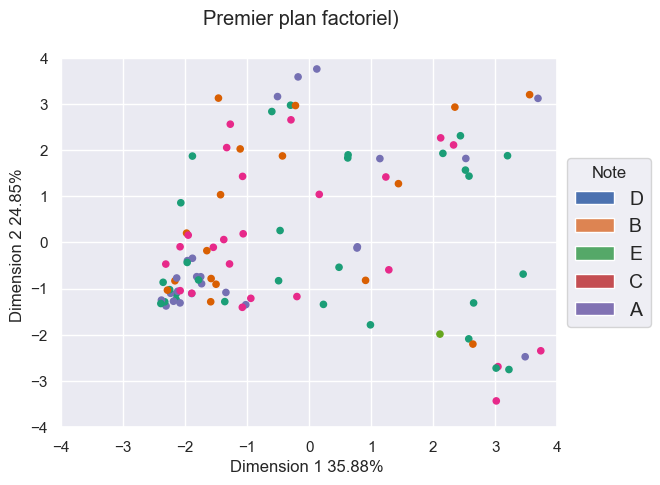

In [62]:
Individus_fat.plot.scatter("D1", "D2",c = [couleurs[p] for p in Individus_fat["nutrition_grade_fr"]]) # nuage de points
plt.xlabel("Dimension 1 {:.02f}% ".format(pca.explained_variance_ratio_[0]*100 )) # modification du nom de l'axe X
plt.ylabel("Dimension 2 {:.02f}% ".format(pca.explained_variance_ratio_[1]*100 )) # idem pour axe Y
plt.suptitle("Premier plan factoriel)") # titre général
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.plot()
plt.legend(wedges, Individus_fat.nutrition_grade_fr.value_counts().index.str.upper(),
          title="Note",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(1, 0, 0.5, 1))

### CORRELATION

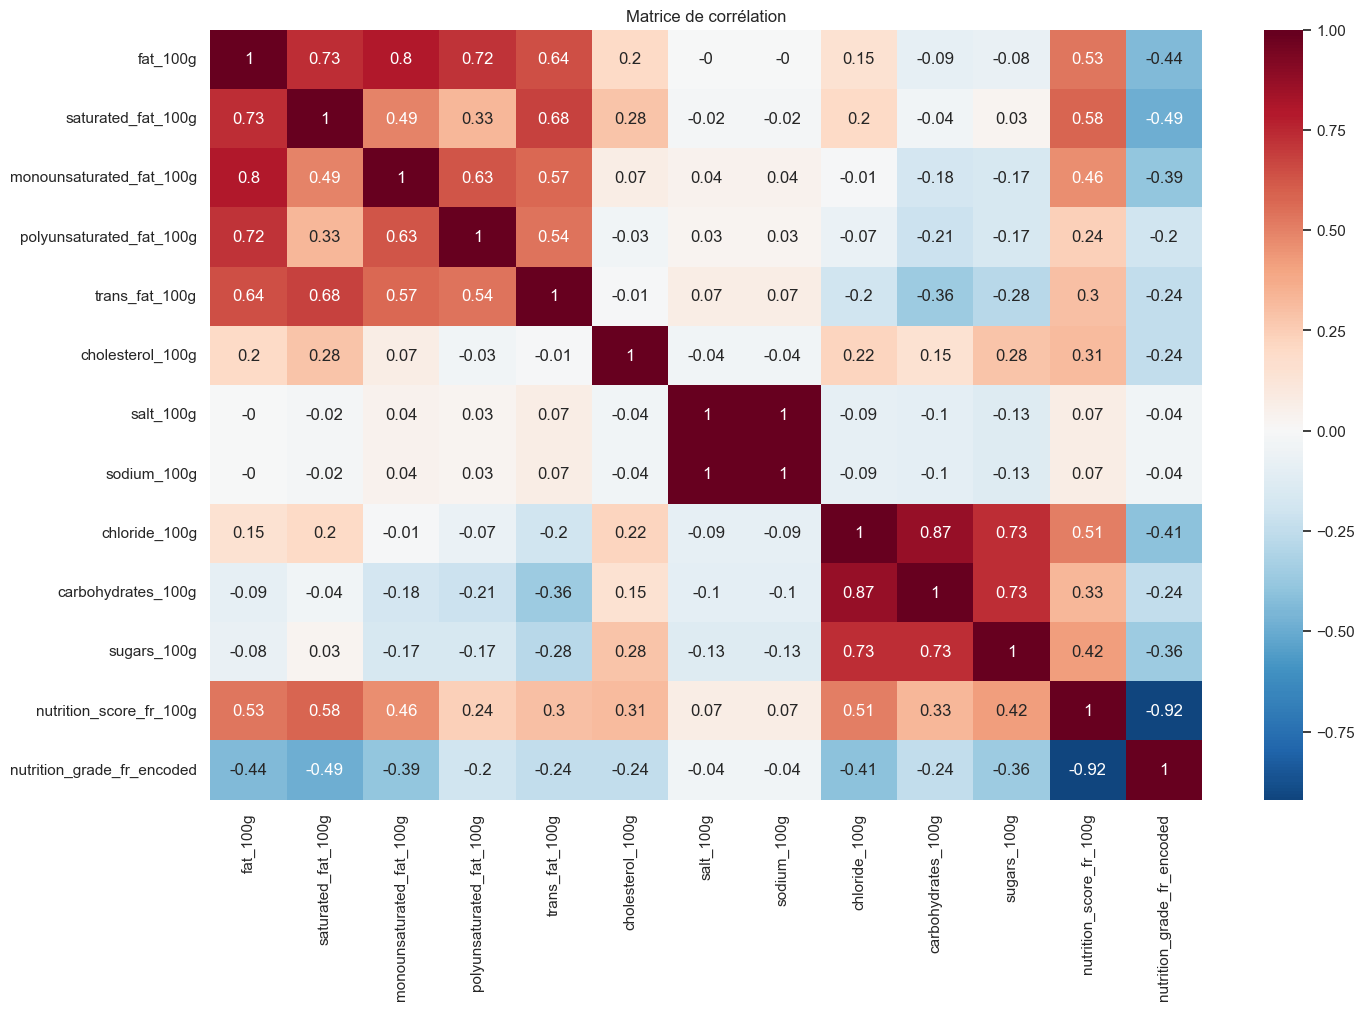

In [63]:
correlation_matrix = df.corr().round(2)

plt.figure(figsize=(16, 10), dpi=100)
plt.title("Matrice de corrélation")
sns.heatmap(correlation_matrix, cmap="RdBu_r", center=0.0, annot=True)
plt.show()

### CERCLE CORRELATION

In [64]:
df_cor = df[['fat_100g', 'saturated_fat_100g', 'monounsaturated_fat_100g',
       'polyunsaturated_fat_100g', 'trans_fat_100g', 'cholesterol_100g',
       'salt_100g', 'sodium_100g', 'chloride_100g', 'carbohydrates_100g',
       'sugars_100g', 'nutrition_score_fr_100g', 'nutrition_grade_fr_encoded']]


In [65]:
n = df_num.shape[0] # nb individus
p = df_num.shape[1] # nb variables
eigval = (n-1) / n * pca.explained_variance_ # valeurs propres
sqrt_eigval = np.sqrt(eigval) # racine carrée des valeurs propres
corvar = np.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(6):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': df_cor.columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})
coordvar

,id,COR_1,COR_2
0,fat_100g,0.887977,-0.136010
1,saturated_fat_100g,0.843106,0.024893
2,monounsaturated_fat_100g,0.830170,-0.385923
3,polyunsaturated_fat_100g,0.625862,-0.368633
4,trans_fat_100g,0.555414,-0.552352
5,cholesterol_100g,0.342566,0.302878
6,salt_100g,0.171920,-0.219657
7,sodium_100g,0.171920,-0.219657
8,chloride_100g,0.307039,0.872802
9,carbohydrates_100g,0.076077,0.884092


Text(0.5, 1.0, 'PCA : Cercle des Corrélations')

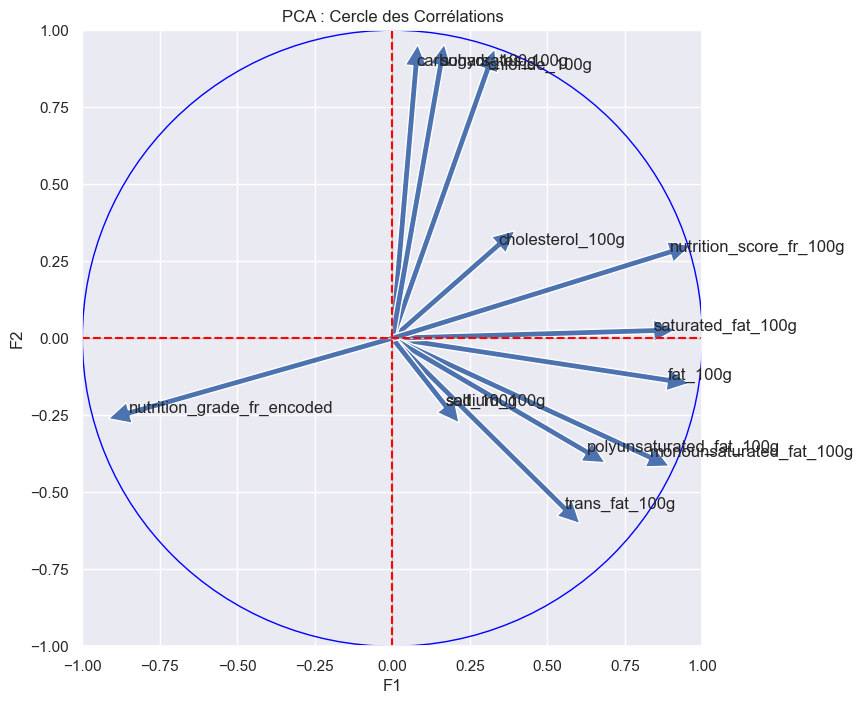

In [66]:


#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(13):
    plt.annotate(df_cor.columns[j],(corvar[j,0],corvar[j,1]))
    axes.arrow(0,
             0,  # Start the arrow at the origin
             corvar[j,0],  #0 for PC1
             corvar[j,1],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)


# Ajouter les lignes et legendes
axes.axhline(y=0, color='red', linestyle='--')
axes.axvline(x=0, color='red', linestyle='--')
axes.set_xlabel('F1')
axes.set_ylabel('F2')
plt.title("PCA : Cercle des Corrélations")

### TEST DE NORMALITE DES DONNEES

### Test de Pearson

In [70]:
s1 = df['nutrition_grade_fr_encoded']
s2 = df['nutrition_score_fr_100g']

print("The Pearson linear correlation coefficient is: r = {}".format(s1.corr(s2, method='pearson')))

The Pearson linear correlation coefficient is: r = -0.9226061221862265


In [71]:
# Constructing the Contingency Table
f_obs = pd.crosstab(df['nutrition_score_fr_100g'], df['nutrition_grade_fr_encoded'],margins=True)

# The Chi-Squared test for independence
from scipy import stats
results = stats.chi2_contingency(f_obs)
print("χ2 = {}\np-value = {}\ndegrees of freedom = {}".format(results[0], results[1], results[2]))

χ2 = 95893.37403264482
p-value = 0.0
degrees of freedom = 185


### K2 d'AGOSTINO

In [72]:
from scipy.stats import normaltest

# filtering non-null data for the feature
k2 = df['nutrition_score_fr_100g'].notnull()
k2_view = df[k2]
k2_nutrition_score = k2_view['nutrition_score_fr_100g']

# Performing D'Agostino's K2 test
stat, p = normaltest(k2_nutrition_score)

# interpret
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = 'Sample does not look Gaussian (reject H0)'
    
print(msg)

Sample does not look Gaussian (reject H0)


In [73]:
from scipy.stats import kstest

# filtering non-null data for the feature
kolm = df['nutrition_score_fr_100g'].notnull()
kolm_view = df[kolm]
kolm_nutrition_score = kolm_view['nutrition_score_fr_100g']

# performing the Kolmogorov-Smirnov test against normal distribution
kstest(kolm_nutrition_score, cdf='norm')

KstestResult(statistic=0.8559218511261149, pvalue=0.0)

### Les résultats montrent que l'échantillon ne répond pas à une loi normale